In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
#create a dataframe
df= pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
#adding new columns as target
df['target']= iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [13]:
df[df.target==1].shape

(50, 5)

In [15]:
#creating a new column as 'flower_name' using lambda function that uses data from 'target' column as 'setosa'==0, 'versicolor'==1, 'virginica'==2 
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Data visualization

In [16]:
from matplotlib import pyplot as plt

In [17]:
%matplotlib inline

In [18]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

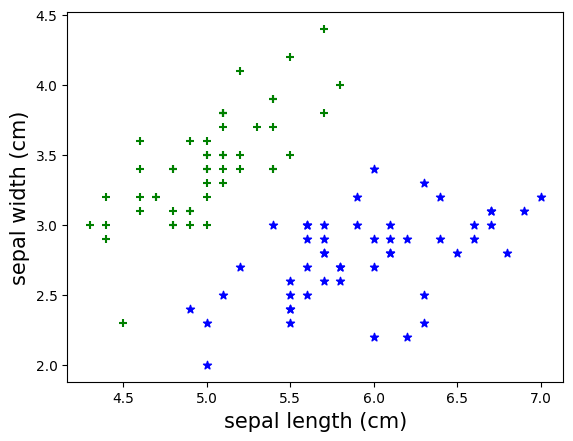

In [26]:
#plotting with first two input features

plt.xlabel('sepal length (cm)', fontsize= 15)
plt.ylabel('sepal width (cm)', fontsize= 15)
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker= '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker= '*')

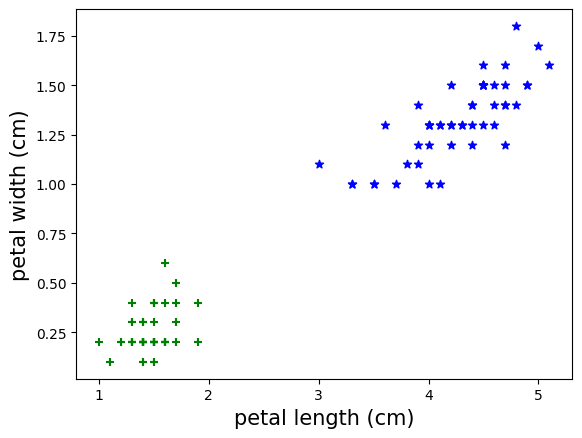

In [28]:
#plotting with last two input features

plt.xlabel('petal length (cm)', fontsize= 15)
plt.ylabel('petal width (cm)', fontsize= 15)
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker= '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker= '*')

# separating training and test dataset

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
X= df.drop(['target', 'flower_name'], axis = 'columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [36]:
len(X_test)

30

In [37]:
len(X_train)

120

# Using SVM Model

In [48]:
from sklearn.svm import SVC
model = SVC()

In [49]:
model.fit(X_train, y_train)

SVC()

In [50]:
model.score(X_test, y_test)

0.9